# Business Problem
  to predict total sales by using features like money spent on marketing on indiviual channels
  the data here is supervised
  and it is a regression task
  
  
  
  • Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

• In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

##### importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the data

In [2]:
data=pd.read_csv('advertising.csv')

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Domain analysis

##### Basic checks

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Insights fron the data

#### Min amount Spend on tv is 0.700000
#### Max amount spend on tv is 296.400000
#### The mean of tv is grester than others
#### Therefore more amount is spend on tv
#### No constant values present in the data.
#### The cost of advertisment on radio is low.
#### In one case their is 0 spend on radio

In [7]:
data.shape

(200, 4)

In [8]:
data.size

800

In [11]:
data.TV.unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## EDA (Exploratory  )

##### step-1 Univariate Analysis

In [17]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


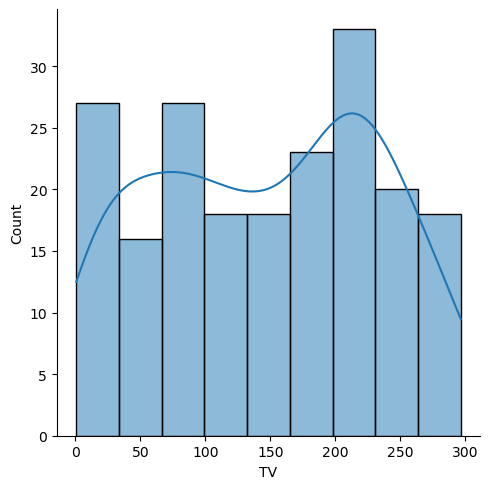

In [7]:
#analyaing tv
sns.displot(x=data.TV,kde=True)
plt.show()

### Tv

#### It has 95% of unique values 
#### The distribution is negatively skewed.
#### The values ranges between 1 to 296


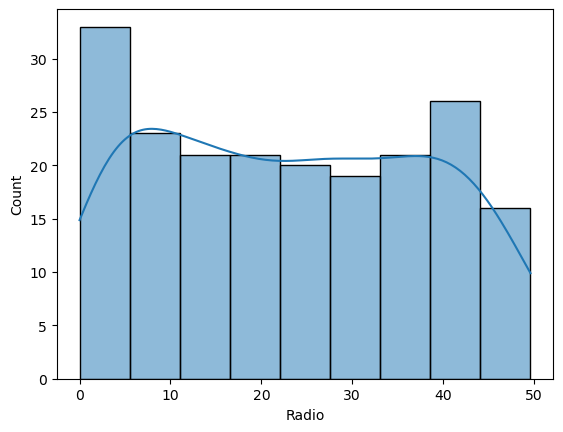

In [8]:
#analyzing Radio
sns.histplot(x=data.Radio,kde=True)
plt.show()

### Radio

####  It has 84% of unique values 
#### The distribution is positively skewed.
#### The values ranges between 0 to 49.6


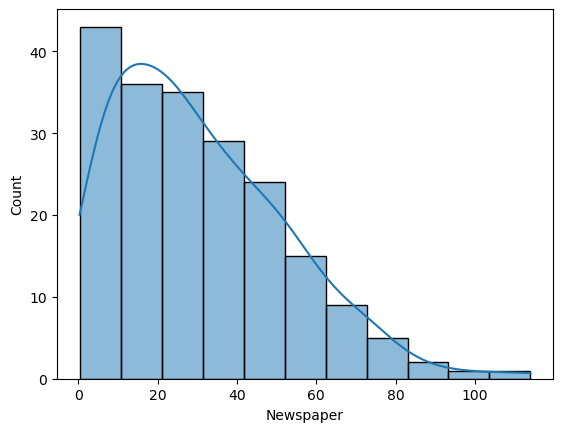

In [9]:
#analyzing Newspaper
sns.histplot(x=data.Newspaper,kde=True)
plt.show()

### Newspaper

###  It has 86% of distinct values 
#### The distribution is positively skewed.
#### The values ranges between 0 to 114
#### Most of values lies between 0 to 40


##### step-2 Bivariate Analysis

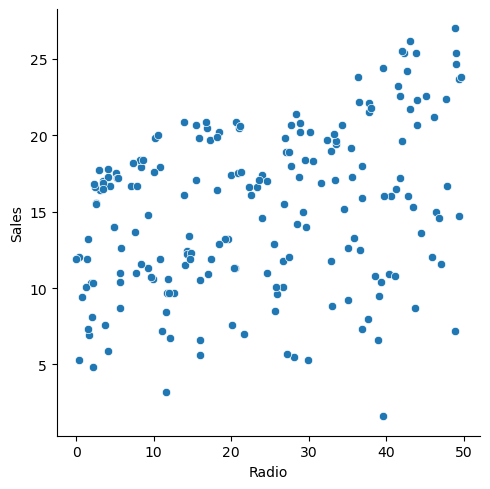

In [10]:
#anaylsisng Radio and sales
sns.relplot(x='Radio',y='Sales',data=data)
plt.show()


#### Radio ads are not showing much trend for the sales of product

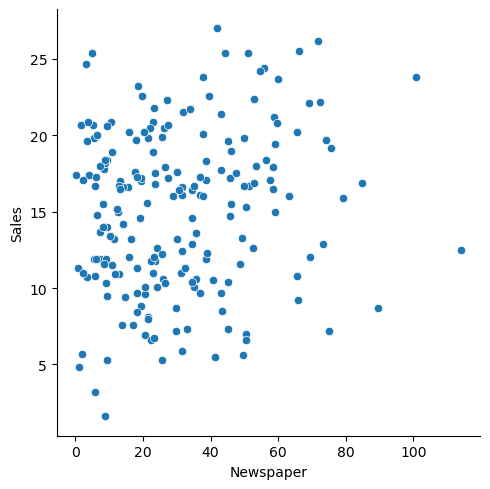

In [11]:
#anaylzind Newspaper ad sales
sns.relplot(x='Newspaper',y='Sales',data=data)
plt.show()


#### Newsapaper is not showing much trend for the sales.

##### steps -3 Multivariate Analysizing

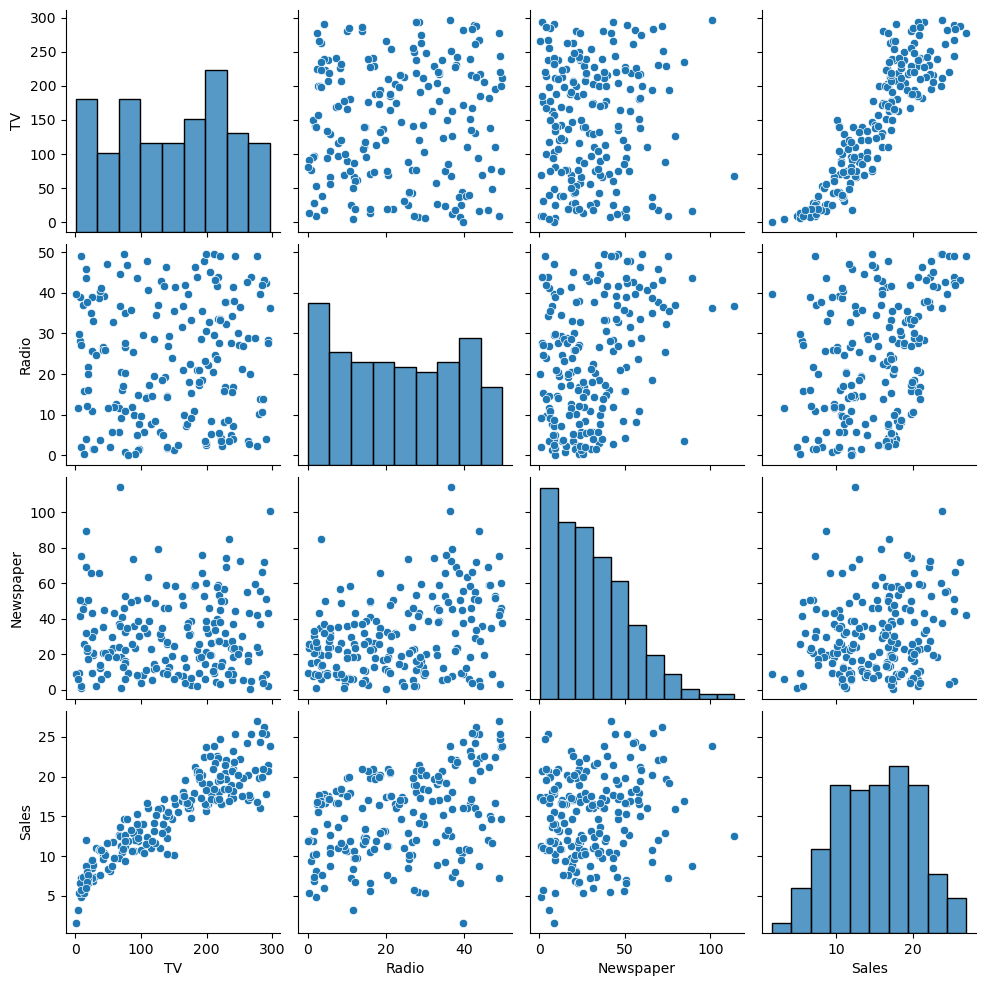

In [12]:
sns.pairplot(data)
plt.show()

Sales and Tv are directly propotional

Sales and Radio are not showing any clear trend 

Newspaper and Sales : Befor 50 newspaper i having good sales but after 50 it has decreased.



# Data Preprocessing and Feature Engineering

##### step 1 Finding missing values

In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

##### step 2 Converting categorical data into numerical

##### step 3 - checking the outlier

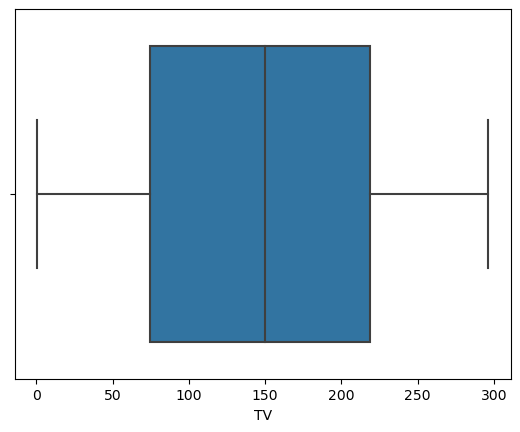

In [8]:
sns.boxplot(x='TV',data=data)
plt.show()
#no outlier

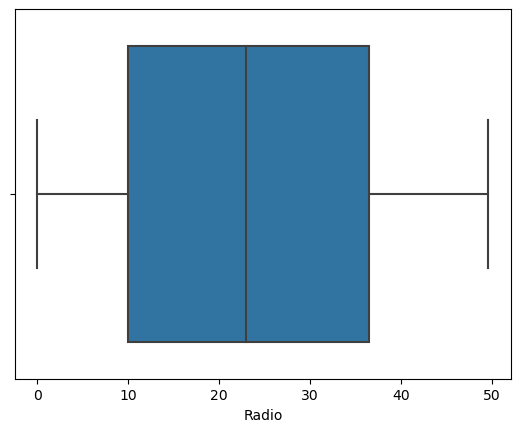

In [9]:
sns.boxplot(x='Radio',data=data)
plt.show()
#no outlier

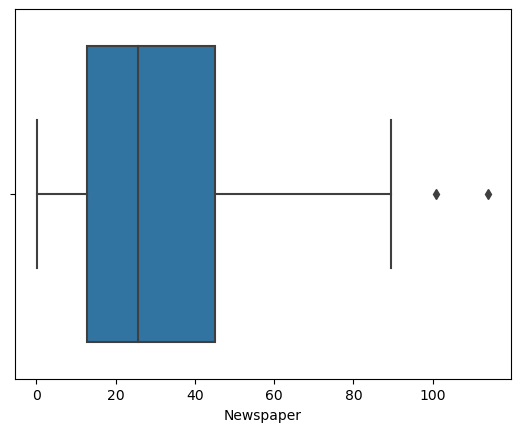

In [10]:
sns.boxplot(x='Newspaper',data=data)
plt.show()
#outlier are present

In [11]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.Newspaper,interpolation='midpoint')
IQR
Q1=data.Newspaper.quantile(0.25)
Q3=data.Newspaper.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [12]:
#Checking outliers in the max limit
data.loc[data['Newspaper']>max_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [13]:
# Handling the outliers with the help of median.
data.loc[data['Newspaper']>max_limit,'Newspaper']=np.median(data.Newspaper)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


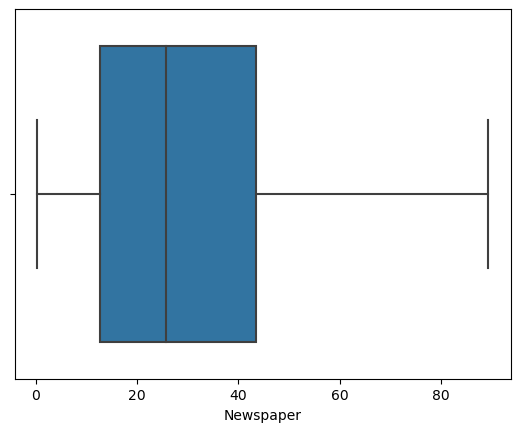

In [14]:
sns.boxplot(data.Newspaper)
plt.show()

##### step - 4 Scaling the continous data

In [15]:
#scaling when algorithms which calulate distance and numerical data
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler() #object creaction
data[['TV','Radio','Newspaper']]
mn.fit_transform(data[['TV','Radio','Newspaper']])


array([[0.77578627, 0.76209677, 0.77328844],
       [0.1481231 , 0.79233871, 0.50280584],
       [0.0557998 , 0.92540323, 0.77441077],
       [0.50997633, 0.83266129, 0.65319865],
       [0.60906324, 0.21774194, 0.65207632],
       [0.02705445, 0.9858871 , 0.83838384],
       [0.19208657, 0.66129032, 0.26038159],
       [0.4041258 , 0.39516129, 0.12682379],
       [0.02671627, 0.04233871, 0.00785634],
       [0.67331755, 0.05241935, 0.2345679 ],
       [0.2211701 , 0.11693548, 0.26823793],
       [0.72370646, 0.48387097, 0.04152637],
       [0.07811972, 0.70766129, 0.7362514 ],
       [0.32735881, 0.15322581, 0.07744108],
       [0.68785932, 0.66330645, 0.51290685],
       [0.65843761, 0.96169355, 0.59034792],
       [0.22691917, 0.73790323, 0.28563412],
       [0.94927291, 0.7983871 , 0.62289562],
       [0.2316537 , 0.41330645, 0.2020202 ],
       [0.49577274, 0.48185484, 0.21099888],
       [0.73621914, 0.55846774, 0.5959596 ],
       [0.80047345, 0.10282258, 0.26038159],
       [0.

In [16]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Feature Selection

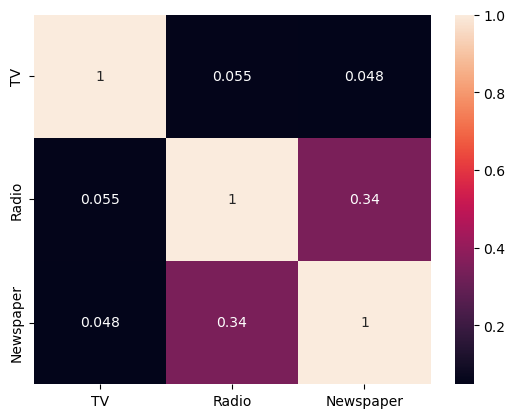

In [17]:
#step 2 chhecking the correlation within the independent variable
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)  #annot gives the value of correaltion
plt.show()

### With the help of heatmap we can see that there is no correlation between petal the variables as they are not crossing the threshold that is 0.9 


In [18]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.901208
Radio,0.054809,1.000000,0.343141,0.349631
Newspaper,0.048462,0.343141,1.000000,0.149471
Sales,0.901208,0.349631,0.149471,1.000000


# Model Creation

##### step 1 Independent and dependent variablee reation


In [19]:
#split -1
#step 1 Independent and dependent variablee creation
X=data[['TV','Radio','Newspaper']]  #dataframe
##X= variable contain all inputs
y=data.Sales #series
#y= is output

In [20]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [21]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

##### step 2 Training and Testing data

In [22]:
#split -2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [23]:
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     14.0
177    16.7
88     12.9
187    17.3
61     24.2
199    18.4
191    11.9
123    15.2
184    17.6
188    20.9
33     17.4
171    17.5
138     9.6
84     21.7
81     17.3
102    19.8
147    25.4
34     11.9
47     23.2
124    19.7
112    17.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    17.2
45     16.1
153    16.0
119     6.6
100    16.7
83     13.6
181    17.2
71     12.4
Name: Sales, dtype: float64

##### step 3 creating model

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()#object creation
LR.fit(X_train,y_train) # trainig of model # fit = it fit it into the formula
y_predict=LR.predict(X_test) # LR =model ,LinearRegression is the algorithms

In [25]:
y_test #actual values

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     14.0
177    16.7
88     12.9
187    17.3
61     24.2
199    18.4
191    11.9
123    15.2
184    17.6
188    20.9
33     17.4
171    17.5
138     9.6
84     21.7
81     17.3
102    19.8
147    25.4
34     11.9
47     23.2
124    19.7
112    17.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    17.2
45     16.1
153    16.0
119     6.6
100    16.7
83     13.6
181    17.2
71     12.4
Name: Sales, dtype: float64

In [26]:
y_predict #values  predicted by model

array([18.83484186, 16.36985844, 21.71645826, 24.88649821, 11.13965825,
       21.79572904, 12.46121948, 14.77982858, 12.17615532, 18.04926351,
       23.41494873, 18.21269493,  9.83347643, 14.91158836, 20.75246805,
       21.70973439, 21.21143002, 15.83902508,  9.63106988, 20.78172386,
       18.22440746, 21.03259637, 23.05056141,  9.97710854, 22.04870952,
       20.63323144, 15.8039098 , 11.1438683 , 19.24760852, 10.97744993,
       11.55124042, 10.5096322 , 16.49276989, 16.55648843, 18.13127528,
        7.3183334 , 17.3133353 , 12.97036072, 17.17083348, 12.12565091])

##### step 3 Model Evalution

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error
r2score=r2_score(y_test,y_predict)
#r2 is the matrix

In [28]:
r2score

0.9045606387869707

In [29]:
#calculating the r2 adjusting
adjusted_r2=1-(1-0.90)*(40-3)/(40-3-1)
adjusted_r2

0.8972222222222223

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,y_predict))

2.020636787138188


In [31]:
#RMSE 
#Returns the mean squared error; we'll take a square root
print(np.sqrt(mean_squared_error(y_test,y_predict)))


1.4214910436362898


#### Thus, overall we can interpret that the model is performing good with 90% of R2 and 89% of adjusted R2.



# GB_Boosting

In [32]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price


In [33]:
X_test.shape

(40, 3)

In [34]:
r2score=r2_score(y_test,y_gbm)
r2score

0.9163037226717882

In [35]:
#calculating the r2 adjusting
adjusted_r2=1-(1-0.91)*(40-3)/(40-3-1)
adjusted_r2

0.9075

#### Overall we can interpret that the model is performing good with 91% of R2 and 90% of adjusted R2.


# KNN

In [36]:
## splitting the training and testing data
XK_train,XK_test,yK_train,yK_test=train_test_split(X,y,random_state=42)

In [37]:
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):
    
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(XK_train, yK_train)  #fit the model
    pred=model.predict(XK_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(yK_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.10304541082688
RMSE value for k=  2 is: 1.754323231334522
RMSE value for k=  3 is: 1.7355242563687905
RMSE value for k=  4 is: 1.7580280145663205
RMSE value for k=  5 is: 1.7720112866457705
RMSE value for k=  6 is: 1.7706354791430106
RMSE value for k=  7 is: 1.7246863068810094
RMSE value for k=  8 is: 1.6878518151780977
RMSE value for k=  9 is: 1.686993819831047
RMSE value for k=  10 is: 1.7641984015410512
RMSE value for k=  11 is: 1.7832647189498365
RMSE value for k=  12 is: 1.8148301114245742
RMSE value for k=  13 is: 1.814754779920032
RMSE value for k=  14 is: 1.8411927700071302
RMSE value for k=  15 is: 1.8615907176390836
RMSE value for k=  16 is: 1.861294492416501
RMSE value for k=  17 is: 1.8449495262270066
RMSE value for k=  18 is: 1.826945774837756
RMSE value for k=  19 is: 1.8205444986234591


In [38]:
from sklearn.metrics import r2_score,mean_absolute_error
r2score=r2_score(yK_test,pred)
r2score

0.8780782331303447

In [39]:
#calculating the r2 adjusting
adjusted_r2=1-(1-0.87)*(40-3)/(40-3-1)
adjusted_r2

0.8663888888888889

In [40]:
import math
print(mean_squared_error(y_test,y_predict))

print(math.sqrt(mean_squared_error(yK_test,pred)))

2.020636787138188
1.8205444986234591


#### Overall we can interpret that the model is performing good with 87% of R2 and 86% of adjusted R2.


# SVM

In [41]:
## creating training and testing data
from sklearn.model_selection import train_test_split
XS_train,XS_test,yS_train,yS_test=train_test_split(X, y,random_state=50)

In [42]:
# Support Vector Classifier Model

from sklearn.svm import SVR
svRegression = SVR() ## base model with default parameters ###onject creation
svRegression.fit(XS_train, yS_train)#traning of the classifier

SVR()

In [43]:
# Predict output for X_test
y_hat=svRegression.predict(XS_test)

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error
r2score=r2_score(yS_test,y_hat)
r2score

0.8634885496314014

Applying GradientBoosting

In [47]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(XS_train,yS_train) ## fitting the data
y_gbm=gbm.predict(XS_test)#predicting the price


In [48]:
r2score=r2_score(yS_test,y_gbm)
r2score

0.9205720226123543

In [49]:
#calculating the r2 adjusting
adjusted_r2=1-(1-0.92)*(40-3)/(40-3-1)
adjusted_r2

0.9177777777777778

#### Overall we can interpret that the model is performing good with 92% of R2 and 91% of adjusted R2.


# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()
#object creation for decision tree  
dt.fit(X_train,y_train)
#training the model
y_hat1=dt.predict(X_test)#prediction
y_hat1#predicted values 

array([17. , 16. , 23.8, 25.4, 10.1, 22.1, 11. , 17.6, 13.3, 18.4, 25.4,
       18.2, 11.3, 16. , 20.9, 20. , 20.9, 16.4, 10.1, 22.6, 17. , 16.1,
       23.8, 14. , 22.1, 19.6, 16.4, 10.1, 18.3, 11. , 12.6, 11.3, 15.6,
       16.6, 18. ,  6.7, 16.4, 14.7, 15.6, 11.9])

In [51]:
from sklearn.metrics import r2_score,mean_absolute_error
r2score=r2_score(y_test,y_hat1)
r2score

0.9026069583242682

In [52]:
#calculating the r2 adjusting
adjusted_r2=1-(1-0.91)*(40-3)/(40-3-1)
adjusted_r2

0.9075

#### Overall we can interpret that the model is performing good with 90% of R2 and 90% of adjusted R2.


# RandomForest

In [53]:
from sklearn.ensemble import RandomForestRegressor #importing randomforest

rf_clf = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestRegressor()

In [54]:
yy_predict=rf_clf.predict(X_test)#testing

In [55]:
from sklearn.metrics import r2_score,mean_absolute_error
r2score=r2_score(y_test,yy_predict)
r2score

0.9391180592476305

In [56]:
#calculating the r2 adjusting
adjusted_r2=1-(1-0.93)*(40-3)/(40-3-1)
adjusted_r2

0.9280555555555556

In [57]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, yy_predict))


1.1353365250004075

#### Overall we can interpret that the model is performing good with 93% of R2 and 92% of adjusted R2.


### Result


| Model               | R2 Score | Adjusted R2 Score  |
|-------------------- |----------|--------------------|
| Linear Regression   | 90%      | 89%                | 
| KNN                 | 87%      | 86%                |
| SVM                 | 92%      | 91%                | 
| Decision Tree       | 90%      | 90%                |
| Random Forest       | 93%      | 92%                |
| GBoost              | 91%      | 90%                |

#### While comparing the model, we find that All the model are performing well but Random forest is giving the highest score, which concludes that it has the highest accuracy among the other models.

#### Overall, machine learning can be a powerful tool for predicting sales and improving business outcomes. Whether you are using regression analysis, time series analysis, decision tree-based algorithms or neural networks, machine learning can help you make more accurate predictions and take action to improve your sales.

